In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

In [3]:
if not os.path.exists('freesound.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/132736__ciccarelli__ocean-waves.wav

In [4]:
from thinkdsp import read_wave

wave = read_wave('freesound.wav')
wave.make_audio()

In [5]:
segment = wave.segment(start=1.5, duration=1.0)
segment.make_audio()

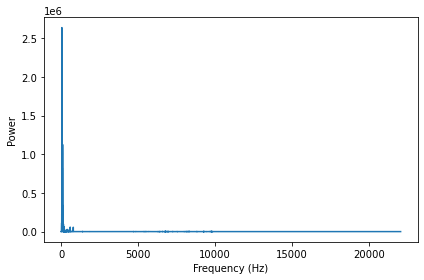

In [6]:
spectrum = segment.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

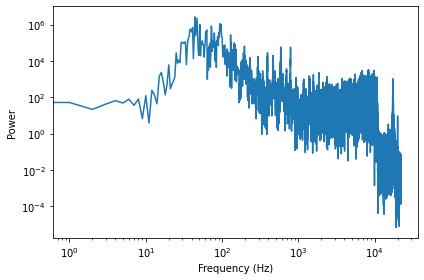

In [7]:
spectrum.plot_power()
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)',
         ylabel='Power', 
         **loglog)

In [8]:
segment2 = wave.segment(start=2.5, duration=1.0)
segment2.make_audio()

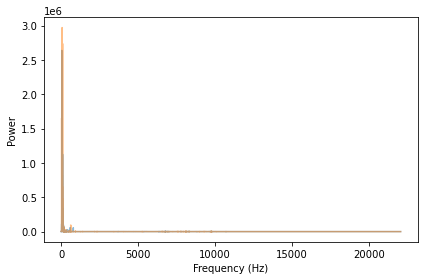

In [9]:
spectrum2 = segment2.make_spectrum()
spectrum.plot_power(alpha=0.5)
spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

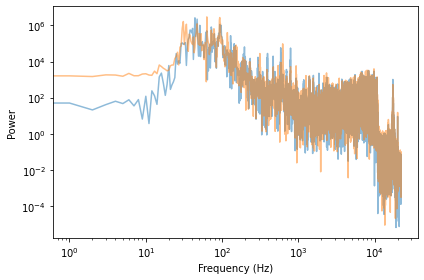

In [10]:
spectrum.plot_power(alpha=0.5)
spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

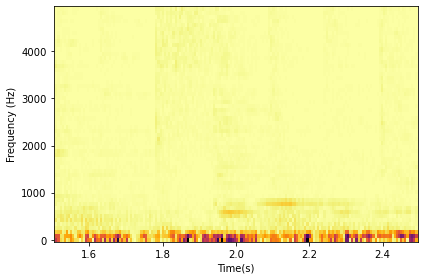

In [11]:
segment.make_spectrogram(512).plot(high=5000)
decorate(xlabel='Time(s)', ylabel='Frequency (Hz)')

In [12]:
from thinkdsp import Spectrum

def bartlett_method(wave, seg_length=512, win_flag=True):
    """Estimates the power spectrum of a noise wave.
    
    wave: Wave
    seg_length: segment length
    """
    # make a spectrogram and extract the spectrums
    spectro = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectro.spec_map.values()
    
    # extract the power array from each spectrum
    psds = [spectrum.power for spectrum in spectrums]
    
    # compute the root mean power (which is like an amplitude)
    hs = np.sqrt(sum(psds) / len(psds))
    fs = next(iter(spectrums)).fs
    
    # make a Spectrum with the mean amplitudes
    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum

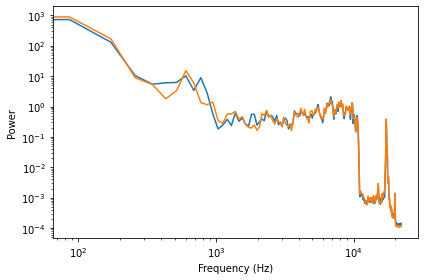

In [13]:
psd = bartlett_method(segment)
psd2 = bartlett_method(segment2)

psd.plot_power()
psd2.plot_power()

decorate(xlabel='Frequency (Hz)', 
         ylabel='Power', 
         **loglog)

# Exercise 2
At coindesk you can download the daily price of a BitCoin as a CSV file. Read this file and compute the spectrum of BitCoin prices as a function of time. Does it resemble white, pink, or Brownian noise?

In [14]:
if not os.path.exists('BTC_USD_2021-06-13_2021-06-20-CoinDesk.csv'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv

In [15]:
import pandas as pd

df = pd.read_csv('BTC_USD_2021-06-13_2021-06-20-CoinDesk.csv', 
                 parse_dates=[0])
df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2021-06-13,35935.806170,35437.620888,36174.268121,34822.580049
1,BTC,2021-06-14,40571.429908,36062.132920,41046.769523,36005.533201
2,BTC,2021-06-15,39946.234845,40697.850498,40859.686129,39365.225470
3,BTC,2021-06-16,38715.872028,40070.809698,41316.602498,38610.513847
4,BTC,2021-06-17,38971.745940,38785.373162,39721.895396,38131.333539
5,BTC,2021-06-18,36467.643050,39062.236323,39147.221774,36394.021848
6,BTC,2021-06-19,35933.412609,36359.385619,36734.134792,34968.012320
7,BTC,2021-06-20,34512.883136,36142.704976,36222.459804,33380.577029


In [16]:
ys = df['Closing Price (USD)']
ts = df.index

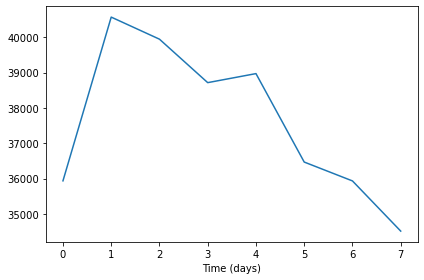

In [17]:
from thinkdsp import Wave

wave = Wave(ys, ts, framerate=1)
wave.plot()
decorate(xlabel='Time (days)')

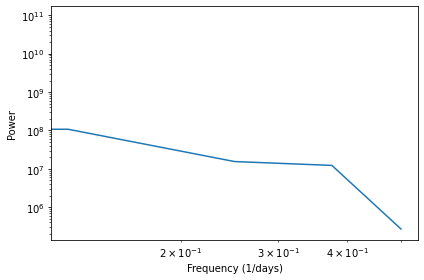

In [18]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (1/days)',
         ylabel='Power', 
         **loglog)

In [19]:
spectrum.estimate_slope()[0]

-3.695202379519589

# Exercise 3
A Geiger counter is a device that detects radiation. When an ionizing particle strikes the detector, it outputs a surge of current. The total output at a point in time can be modeled as uncorrelated Poisson (UP) noise, where each sample is a random quantity from a Poisson distribution, which corresponds to the number of particles detected during an interval.

Write a class called UncorrelatedPoissonNoise that inherits from _Noise and provides evaluate. It should use np.random.poisson to generate random values from a Poisson distribution. The parameter of this function, lam, is the average number of particles during each interval. You can use the attribute amp to specify lam. For example, if the framerate is 10 kHz and amp is 0.001, we expect about 10 “clicks” per second.

Generate about a second of UP noise and listen to it. For low values of amp, like 0.001, it should sound like a Geiger counter. For higher values it should sound like white noise. Compute and plot the power spectrum to see whether it looks like white noise.

In [20]:
from thinkdsp import Noise

class UncorrelatedPoissonNoise(Noise):
    """Represents uncorrelated Poisson noise."""

    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        ys = np.random.poisson(self.amp, len(ts))
        return ys

In [21]:
amp = 0.001
framerate = 10000
duration = 1

signal = UncorrelatedPoissonNoise(amp=amp)
wave = signal.make_wave(duration=duration, framerate=framerate)
wave.make_audio()

In [22]:
expected = amp * framerate * duration
actual = sum(wave.ys)
print(expected, actual)

10.0 12


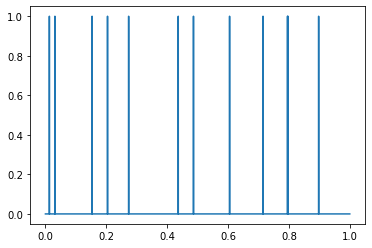

In [23]:
wave.plot()

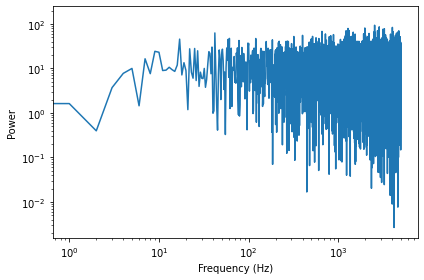

In [24]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

In [25]:
spectrum.estimate_slope().slope

-0.0015312791222870665

In [26]:
amp = 1
framerate = 10000
duration = 1

signal = UncorrelatedPoissonNoise(amp=amp)
wave = signal.make_wave(duration=duration, framerate=framerate)
wave.make_audio()

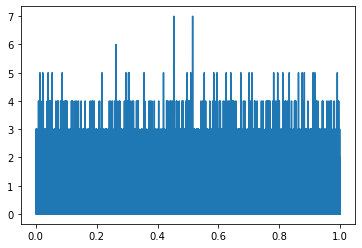

In [27]:
wave.plot()

In [28]:
import matplotlib.pyplot as plt

def normal_prob_plot(sample, fit_color='0.8', **options):
    """Makes a normal probability plot with a fitted line.

    sample: sequence of numbers
    fit_color: color string for the fitted line
    options: passed along to Plot
    """
    n = len(sample)
    xs = np.random.normal(0, 1, n)
    xs.sort()
    
    ys = np.sort(sample)
    
    mean, std = np.mean(sample), np.std(sample)
    fit_ys = mean + std * xs
    plt.plot(xs, fit_ys, color='gray', alpha=0.5, label='model')

    plt.plot(xs, ys, **options)

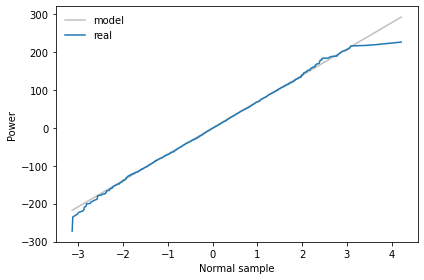

In [29]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0

normal_prob_plot(spectrum.real, label='real')
decorate(xlabel='Normal sample',
        ylabel='Power')

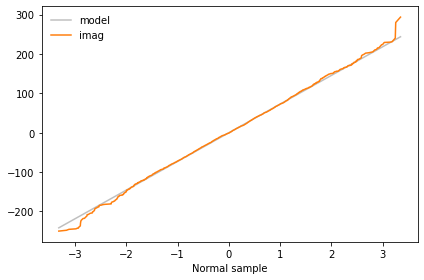

In [30]:
normal_prob_plot(spectrum.imag, label='imag', color='C1')
decorate(xlabel='Normal sample')